#Get Dataset: 

[link dataset](https://huggingface.co/datasets/uit-nlp/vietnamese_students_feedback) 

[original repo](https://www.kaggle.com/code/arunmohan003/sentiment-analysis-using-lstm-pytorch/notebook)

##Vietnamese students feedback

In [2]:
from google.colab import drive
drive.mount('/content/driver')

Mounted at /content/driver


In [3]:
%cd /content/driver/MyDrive/sentimentanalysis/Sentiment_analysis

/content/driver/MyDrive/sentimentanalysis/Sentiment_analysis


In [4]:
import requests
import csv
import os
import gdown
import shutil
import pandas as pd

path_train = "train.csv"
path_val = "val.csv"
path_test = "test.csv"

###Complete version datadet

In [5]:
if not os.path.exists('tmp'):
  os.mkdir('tmp')
    
filename_down = (
  ("https://drive.google.com/uc?id=1nzak5OkrheRV1ltOGCXkT671bmjODLhP&export=download", "tmp/train_sentence.txt"),
  ("https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv&export=download", "tmp/train_sentiment.txt"),
  ("https://drive.google.com/uc?id=1sMJSR3oRfPc3fe1gK-V3W5F24tov_517&export=download", "tmp/val_sentence.txt"),
  ("https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL&export=download", "tmp/val_sentiment.txt"),
  ("https://drive.google.com/uc?id=1aNMOeZZbNwSRkjyCWAGtNCMa3YrshR-n&export=download", "tmp/test_sentence.txt"),
  ("https://drive.google.com/uc?id=1vkQS5gI0is4ACU58-AbWusnemw7KZNfO&export=download", "tmp/test_sentiment.txt")
)

for it in filename_down:
  gdown.download(it[0], it[1], quiet=False)

def concat_data(url1, url2, out):
  with open(url1, 'r') as f:
    df1 = f.read().split('\n')[:-1]
  with open(url2, 'r') as f:
    df2 = f.read().split('\n')[:-1]
  
  df = pd.DataFrame({'sentence': df1,  'sentiment': df2})
  df.to_csv(out, index=False)

concat_data('tmp/train_sentence.txt', 'tmp/train_sentiment.txt', path_train)
concat_data('tmp/val_sentence.txt', 'tmp/val_sentiment.txt', path_val)
concat_data('tmp/test_sentence.txt', 'tmp/test_sentiment.txt', path_test)

shutil.rmtree('tmp')

Downloading...
From: https://drive.google.com/uc?id=1nzak5OkrheRV1ltOGCXkT671bmjODLhP&export=download
To: /content/driver/MyDrive/sentimentanalysis/Sentiment_analysis/tmp/train_sentence.txt
100%|██████████| 898k/898k [00:00<00:00, 98.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1ye-gOZIBqXdKOoi_YxvpT6FeRNmViPPv&export=download
To: /content/driver/MyDrive/sentimentanalysis/Sentiment_analysis/tmp/train_sentiment.txt
100%|██████████| 22.9k/22.9k [00:00<00:00, 17.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1sMJSR3oRfPc3fe1gK-V3W5F24tov_517&export=download
To: /content/driver/MyDrive/sentimentanalysis/Sentiment_analysis/tmp/val_sentence.txt
100%|██████████| 119k/119k [00:00<00:00, 25.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=1GiY1AOp41dLXIIkgES4422AuDwmbUseL&export=download
To: /content/driver/MyDrive/sentimentanalysis/Sentiment_analysis/tmp/val_sentiment.txt
100%|██████████| 3.17k/3.17k [00:00<00:00, 5.75MB/s]
Downloading...
From: https://drive

##Stop words



In [6]:
stop_words = open("notebook/stopwords.txt", "r").read()

In [7]:
stop_words

'a lô\na ha\nai\nai ai\nai nấy\nai đó\nalô\namen\nanh\nanh ấy\nba\nba ba\nba bản\nba cùng\nba họ\nba ngày\nba ngôi\nba tăng\nbao giờ\nbao lâu\nbao nhiêu\nbao nả\nbay biến\nbiết\nbiết bao\nbiết bao nhiêu\nbiết chắc\nbiết chừng nào\nbiết mình\nbiết mấy\nbiết thế\nbiết trước\nbiết việc\nbiết đâu\nbiết đâu chừng\nbiết đâu đấy\nbiết được\nbuổi\nbuổi làm\nbuổi mới\nbuổi ngày\nbuổi sớm\nbà\nbà ấy\nbài\nbài bác\nbài bỏ\nbài cái\nbác\nbán\nbán cấp\nbán dạ\nbán thế\nbây bẩy\nbây chừ\nbây giờ\nbây nhiêu\nbèn\nbéng\nbên\nbên bị\nbên có\nbên cạnh\nbông\nbước\nbước khỏi\nbước tới\nbước đi\nbạn\nbản\nbản bộ\nbản riêng\nbản thân\nbản ý\nbất chợt\nbất cứ\nbất giác\nbất kì\nbất kể\nbất kỳ\nbất luận\nbất ngờ\nbất nhược\nbất quá\nbất quá chỉ\nbất thình lình\nbất tử\nbất đồ\nbấy\nbấy chầy\nbấy chừ\nbấy giờ\nbấy lâu\nbấy lâu nay\nbấy nay\nbấy nhiêu\nbập bà bập bõm\nbập bõm\nbắt đầu\nbắt đầu từ\nbằng\nbằng cứ\nbằng không\nbằng người\nbằng nhau\nbằng như\nbằng nào\nbằng nấy\nbằng vào\nbằng được\nbằng ấy\nbển\

#Code

In [8]:
import numpy as np 
import torch
import torch.nn as nn
import torch.nn.functional as F
from nltk.corpus import stopwords 
from collections import Counter
import string
import re
import seaborn as sns
from tqdm import tqdm
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split


In [9]:
random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

In [10]:
device = ('cpu', 'cuda')[torch.cuda.is_available()]

df_train = pd.read_csv(path_train)
df_val = pd.read_csv(path_val)
df_train.head()

,sentence,sentiment
0,slide giáo trình đầy đủ .,2
1,"nhiệt tình giảng dạy , gần gũi với sinh viên .",2
2,đi học đầy đủ full điểm chuyên cần .,0
3,chưa áp dụng công nghệ thông tin và các thiết ...,0
4,"thầy giảng bài hay , có nhiều bài tập ví dụ ng...",2


In [11]:
x_train, y_train = df_train['sentence'], df_train['sentiment']
x_val, y_val = df_val['sentence'], df_val['sentiment']
print(f'shape of train data is {x_train.shape}')
print(f'shape of val data is {x_val.shape}')

shape of train data is (11426,)
shape of val data is (1583,)


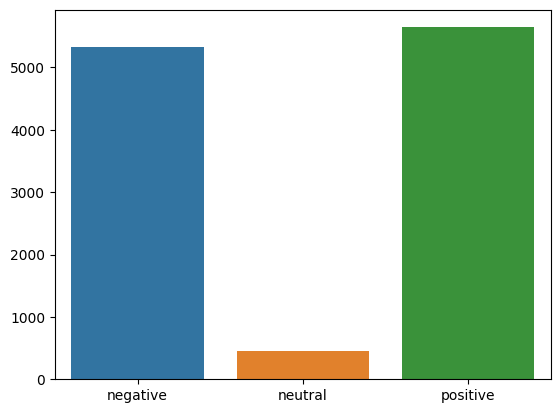

In [12]:
dd = pd.Series(y_train).value_counts().sort_index()
sns.barplot(x=np.array(['negative', 'neutral', 'positive']), y=dd.values)
plt.show()

###Preprocess

In [13]:
def preprocess_string(s):
  # Remove all non-word characters (everything except numbers and letters)
  s = re.sub(r"[^\w\s]", '', s)
  # Replace all runs of whitespaces with no space
  s = re.sub(r"\s+", '', s)
  # replace digits with no space
  s = re.sub(r"\d", '', s)

  return s

def tockenize(x_train, y_train, x_val, y_val, stop_words):
  word_list = []

  stop_words = stop_words.split('\n')
  for sent in x_train:
    for word in sent.lower().split():
      word = preprocess_string(word)
      if word not in stop_words and word != '':
        word_list.append(word)

  corpus = Counter(word_list)
  # sorting on the basis of most common words
  corpus_ = sorted(corpus, key=corpus.get, reverse=True)[:1000]
  # creating a dict
  onehot_dict = {w:i+1 for i,w in enumerate(corpus_)}
  
  # tockenize
  final_list_train, final_list_test = [],[]
  for sent in x_train:
    final_list_train.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                              if preprocess_string(word) in onehot_dict.keys()])
  for sent in x_val:
    final_list_test.append([onehot_dict[preprocess_string(word)] for word in sent.lower().split() 
                            if preprocess_string(word) in onehot_dict.keys()])
          
  return np.array(final_list_train), np.array(y_train), np.array(final_list_test), np.array(y_val), onehot_dict

In [14]:
x_train.shape

(11426,)

In [15]:
x_train, y_train, x_val, y_val, vocab = tockenize(x_train[1:], y_train[1:], x_val, y_val, stop_words)
print(f'Length of vocabulary is {len(vocab)}')

Length of vocabulary is 1000


<ipython-input-13-6b43aa1cf7a9>:36: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return np.array(final_list_train), np.array(y_train), np.array(final_list_test), np.array(y_val), onehot_dict


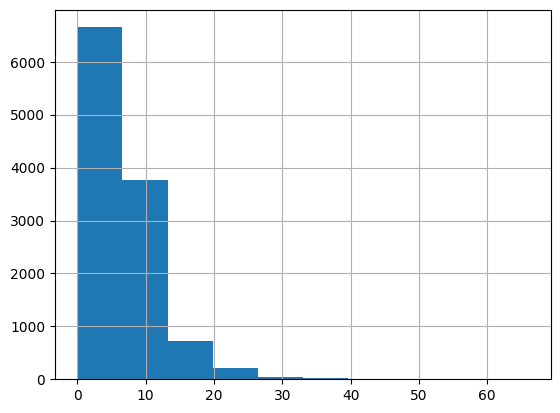

count    11425.000000
mean         6.869847
std          4.856641
min          0.000000
25%          4.000000
50%          6.000000
75%          9.000000
max         66.000000
dtype: float64

In [16]:
rev_len = [len(i) for i in x_train]
pd.Series(rev_len).hist()
plt.show()
pd.Series(rev_len).describe()

In [17]:
def padding_(sentences, seq_len):
  features = np.zeros((len(sentences), seq_len),dtype=int)
  for ii, review in enumerate(sentences):
    if len(review) != 0:
      features[ii, -len(review):] = np.array(review)[:seq_len]
  return features

In [18]:
# we have very less number of reviews with length > 500.
# So we will consideronly those below it.
x_train_pad = padding_(x_train, 500)
x_val_pad = padding_(x_val, 500)

In [19]:
x_train_pad.shape

(11425, 500)

In [20]:
batch_size = 64

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(x_train_pad), torch.from_numpy(y_train))
valid_data = TensorDataset(torch.from_numpy(x_val_pad), torch.from_numpy(y_val))

# dataloaders

# make sure to SHUFFLE your data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size)

In [22]:
# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = next(dataiter)

print('Sample input size: ', sample_x.size()) # batch_size, seq_length
print('Sample input: \n', sample_x)
print('Sample input: \n', sample_y)

Sample input size:  torch.Size([64, 500])
Sample input: 
 tensor([[  0,   0,   0,  ...,  73,  48, 124],
        [  0,   0,   0,  ..., 211,   5,   1],
        [  0,   0,   0,  ..., 763, 293,  28],
        ...,
        [  0,   0,   0,  ...,   5, 105,  16],
        [  0,   0,   0,  ...,   0,   0,  30],
        [  0,   0,   0,  ..., 196, 229,   6]])
Sample input: 
 tensor([0, 0, 2, 2, 2, 2, 0, 2, 2, 0, 2, 0, 2, 2, 2, 0, 1, 2, 0, 0, 2, 0, 2, 0,
        2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2,
        2, 0, 0, 2, 2, 0, 2, 2, 0, 2, 0, 2, 0, 2, 0, 2])


###Model

In [23]:
# !pip install ipdb

In [24]:
class SentimentRNN(nn.Module):
  def __init__(self, no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.5):
    super(SentimentRNN,self).__init__()

    self.output_dim = output_dim
    self.hidden_dim = hidden_dim

    self.no_layers = no_layers
    self.vocab_size = vocab_size

    # embedding and LSTM layers
    self.embedding = nn.Embedding(vocab_size, embedding_dim)
    
    #lstm
    self.lstm = nn.LSTM(input_size=embedding_dim,hidden_size=self.hidden_dim,
                        num_layers=no_layers, batch_first=True)
    
    # dropout layer
    self.dropout = nn.Dropout(drop_prob)

    self.fc = nn.Linear(self.hidden_dim, output_dim)
      
  def forward(self, x):
    batch_size = x.size(0)
    # embeddings and lstm_out
    embeds = self.embedding(x)  # shape: B x S x Feature   since batch = True
    
    #print(embeds.shape)  #[50, 500, 1000]

    lstm_out, _ = self.lstm(embeds)
    lstm_out = lstm_out.contiguous().view(-1, self.hidden_dim) 
    
    # dropout and fully connected layer
    out = self.dropout(lstm_out)
    out = self.fc(out)

    # sigmoid function
    log_out = nn.functional.log_softmax(out, -1)
    
    # reshape to be batch_size first
    log_out = log_out.view(batch_size, log_out.shape[0]//batch_size, self.output_dim)

    log_out = log_out[:, -1, :] # get last batch of labels

    return log_out

###Train

In [25]:
no_layers = 2
vocab_size = len(vocab) + 1 # extra 1 for padding
embedding_dim = 64
output_dim = 3
hidden_dim = 256

model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.5)

# moving to device
model.to(device)

print(model)

SentimentRNN(
  (embedding): Embedding(1001, 64)
  (lstm): LSTM(64, 256, num_layers=2, batch_first=True)
  (dropout): Dropout(p=0.5, inplace=False)
  (fc): Linear(in_features=256, out_features=3, bias=True)
)


In [26]:
# loss and optimization functions
lr=0.001

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=lr)

# function to predict accuracy
def acc(pred, label):
  return torch.sum(pred.squeeze().argmax(1) == label.squeeze()).item()

In [27]:
clip = 5
epochs = 5
valid_loss_min = np.Inf
# train for some number of epochs
epoch_tr_loss, epoch_vl_loss = [], []
epoch_tr_acc, epoch_vl_acc = [], []

for epoch in range(epochs):
  train_losses = []
  train_acc = 0.0
  model.train()
  # initialize hidden state 
  for inputs, labels in train_loader:
    inputs, labels = inputs.to(device), labels.to(device)   
    # Creating new variables for the hidden state, otherwise
    # we'd backprop through the entire training history
    
    model.zero_grad()
    output = model(inputs)

    # calculate the loss and perform backprop
    loss = criterion(output.squeeze(), labels)
    loss.backward()
    train_losses.append(loss.item())
    # calculating accuracy
    accuracy = acc(output, labels)
    train_acc += accuracy
    #`clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
    nn.utils.clip_grad_norm_(model.parameters(), clip)
    optimizer.step()

  val_losses = []
  val_acc = 0.0
  model.eval()
  for inputs, labels in valid_loader:
    inputs, labels = inputs.to(device), labels.to(device)

    output = model(inputs)
    val_loss = criterion(output.squeeze(), labels)

    val_losses.append(val_loss.item())
    
    accuracy = acc(output, labels)
    val_acc += accuracy
          
  epoch_train_loss = np.mean(train_losses)
  epoch_val_loss = np.mean(val_losses)
  epoch_train_acc = train_acc/len(train_loader.dataset)
  epoch_val_acc = val_acc/len(valid_loader.dataset)
  epoch_tr_loss.append(epoch_train_loss)
  epoch_vl_loss.append(epoch_val_loss)
  epoch_tr_acc.append(epoch_train_acc)
  epoch_vl_acc.append(epoch_val_acc)
  print(f'Epoch {epoch+1}') 
  print(f'train_loss: {epoch_train_loss}  val_loss: {epoch_val_loss}')
  print(f'train_accuracy: {epoch_train_acc*100}  val_accuracy: {epoch_val_acc*100}')

  if epoch_val_loss <= valid_loss_min:
    torch.save(model.state_dict(), './state_dict.pt')
    print('Validation loss decreased ({:.6f} --> {:.6f}). Saving model ...'.format(valid_loss_min, epoch_val_loss))
    valid_loss_min = epoch_val_loss
  print(25*'==')

Epoch 1
train_loss: 0.6472014298652138  val_loss: 0.5613182747364044
train_accuracy: 70.75711159737418  val_accuracy: 76.56348704990525
Validation loss decreased (inf --> 0.561318). Saving model ...
Epoch 2
train_loss: 0.5332907398319777  val_loss: 0.524343101978302
train_accuracy: 78.0218818380744  val_accuracy: 78.33228048010106
Validation loss decreased (0.561318 --> 0.524343). Saving model ...
Epoch 3
train_loss: 0.4942647772294849  val_loss: 0.5104485940933228
train_accuracy: 80.15754923413567  val_accuracy: 78.6481364497789
Validation loss decreased (0.524343 --> 0.510449). Saving model ...
Epoch 4
train_loss: 0.4619628184334526  val_loss: 0.5021273720264435
train_accuracy: 81.36542669584244  val_accuracy: 78.96399241945673
Validation loss decreased (0.510449 --> 0.502127). Saving model ...
Epoch 5
train_loss: 0.43561855050105625  val_loss: 0.5090769302845001
train_accuracy: 82.91466083150985  val_accuracy: 79.97473152242578


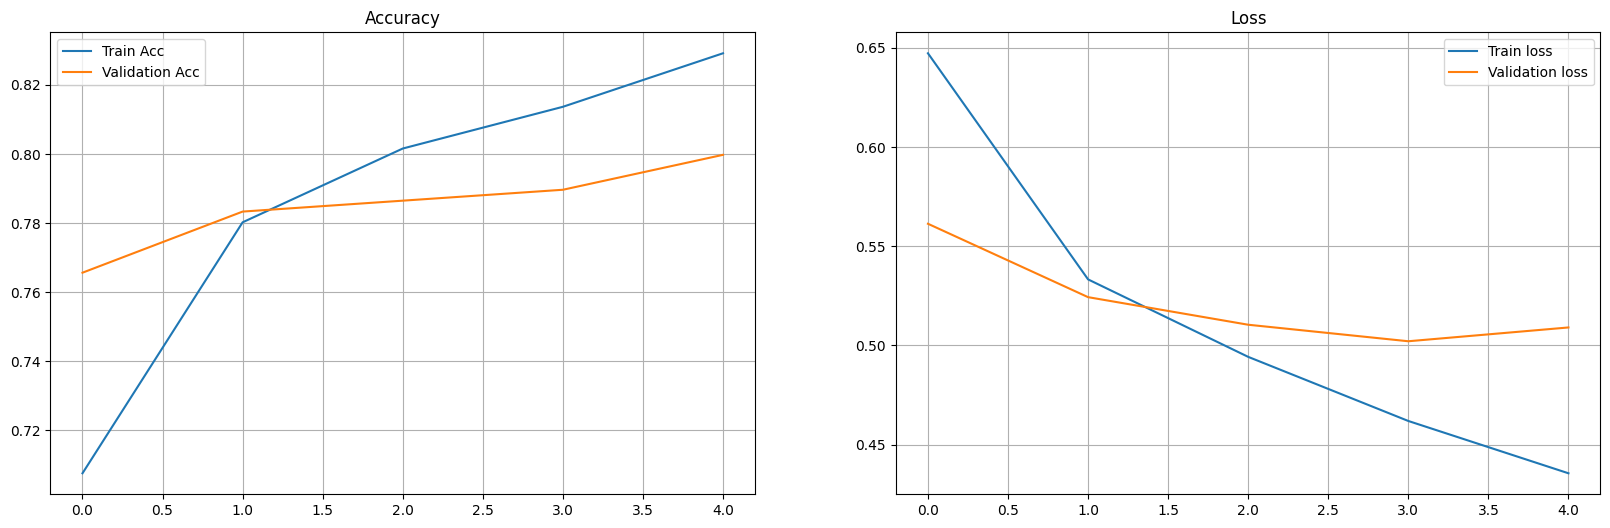

In [28]:
fig = plt.figure(figsize = (20, 6))
plt.subplot(1, 2, 1)
plt.plot(epoch_tr_acc, label='Train Acc')
plt.plot(epoch_vl_acc, label='Validation Acc')
plt.title("Accuracy")
plt.legend()
plt.grid()
    
plt.subplot(1, 2, 2)
plt.plot(epoch_tr_loss, label='Train loss')
plt.plot(epoch_vl_loss, label='Validation loss')
plt.title("Loss")
plt.legend()
plt.grid()

plt.show()

###Test

In [29]:
def predict_text(text):
  word_seq = np.array([vocab[preprocess_string(word)] for word in text.split() 
                    if preprocess_string(word) in vocab.keys()])
  word_seq = np.expand_dims(word_seq, axis=0)
  pad =  torch.from_numpy(padding_(word_seq, 500))
  inputs = pad.to(device)
  output = model(inputs)
  return output

df_test = pd.read_csv(path_test)

labels = ('negative', 'neutral', 'positive')

df_test['sentiment'] = [labels[i] for i in df_test['sentiment']]

# ===============================================
model = SentimentRNN(no_layers, vocab_size, hidden_dim, embedding_dim, output_dim, drop_prob=0.5).to(device)
model.load_state_dict(torch.load('./state_dict.pt'))
model.eval()
with torch.no_grad():
  pred = [labels[predict_text(it).argmax(1)] for it in df_test['sentence']]
  df_test.insert(2, 'pred', pred)

print('Test accuracy:', np.sum(df_test['sentiment'] == df_test['pred'])/len(df_test['sentiment']))

df_test.head()

Test accuracy: 0.7747946936197094


,sentence,sentiment,pred
0,nói tiếng anh lưu loát .,positive,negative
1,giáo viên rất vui tính .,positive,positive
2,cô max có tâm .,positive,positive
3,"giảng bài thu hút , dí dỏm .",positive,positive
4,"giáo viên không giảng dạy kiến thức , hướng dẫ...",negative,positive
